#### Applied Machine Learning: Module 2 (Supervised learning, Part 1)

##### Preamble and Review

In [1]:
%matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('../week1/refereneces/Files_all/Files/home/jovyan/work/fruit_data_with_colors.txt') #
# print(fruits)

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_name_fruits = ['apple', 'mandrin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test_scaled, y_test)))

# exaple fruit preditcion
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is', target_name_fruits[knn.predict(example_fruit_scaled)[0]])




Using matplotlib backend: <object object at 0x7f16c19ee650>
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.93
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is orange


/home/savan/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Datasets

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
import sys
 
# adding Folder_2 to the system path
sys.path.insert(0, '../week1/refereneces/Files_all/Files/home/jovyan/work/')

from adspy_shared_utilities import load_crime_dataset

cmap_bold = LostedColorMap([''])


NameError: name 'LostedColorMap' is not defined

In [3]:
cancer = load_breast_cancer()

print("-----------------------")
print(cancer.feature_names)
print(cancer.target_names)

-----------------------
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


#### K-Nearest Neighbors

#### Linear models for regression

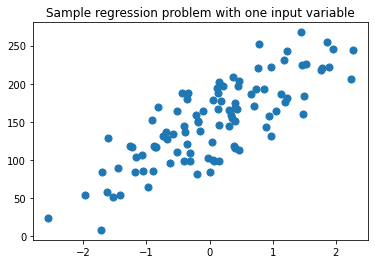

In [4]:
# Dataset for linear regression
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model  intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training) {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test) {}'.format(linreg.score(X_test, y_test)))



linear model coeff (w): [45.71]
linear model  intercept (b): 148.446
R-squared score (training) 0.679
R-squared score (test) 0.4915961593493031


Example plot

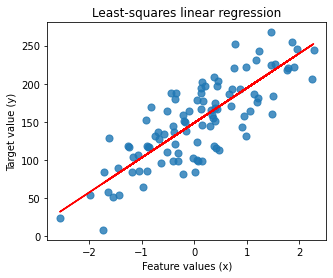

In [6]:
plt.figure(figsize = (5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature values (x)')
plt.ylabel('Target value (y)')
plt.show()

##### Ridge Regression


In [7]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept {}'.format(linridge.intercept_))
print('ridge regression linear model coeff {}'.format(linreg.coef_))
print('R-squared score (training) : {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test) : {}'.format(linridge.score(X_test, y_test)))



ridge regression linear model intercept 148.48609932907925
ridge regression linear model coeff [45.71]
R-squared score (training) : 0.650
R-squared score (test) : 0.5451234572218493


plot on the Ridge 

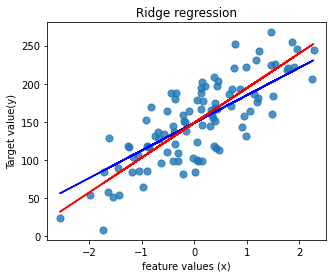

In [8]:
plt.figure(figsize = (5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linridge.coef_*X_R1 + linridge.intercept_, 'b-')
plt.plot(X_R1, linreg.coef_*X_R1 + linreg.intercept_, 'r-')
plt.title('Ridge regression')
plt.xlabel('feature values (x)')
plt.ylabel('Target value(y)')
plt.show()


#### Lesso Regression

In [9]:
from sklearn.linear_model import Lasso

X_train , X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linlasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train, y_train)

print('Lasso Regression Linear model intercept : {}'.format(linlasso.intercept_))
print('Lesso Regression coeff: {}'.format(linlasso.coef_))
print('R-squared Training {}'.format(linlasso.score(X_train, y_train)))
print('R-square Testing {}'.format(linlasso.score(X_test, y_test)))

Lasso Regression Linear model intercept : 148.45409741148222
Lesso Regression coeff: [43.76]
R-squared Training 0.6773561732289834
R-square Testing 0.5094365344906955


plot leesso

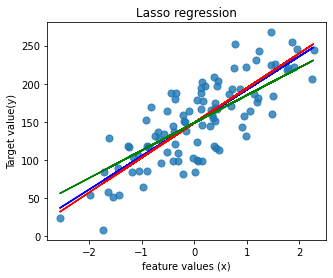

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linlasso.coef_*X_R1 + linlasso.intercept_, 'b-')
plt.plot(X_R1, linreg.coef_*X_R1 + linreg.intercept_, 'r-')
plt.plot(X_R1, linridge.coef_*X_R1 + linridge.intercept_, 'g-')
plt.title('Lasso regression')
plt.xlabel('feature values (x)')
plt.ylabel('Target value(y)')
plt.show()


#### Polynomial Regression

linear Regression coeff : [45.71]
linear regression intercept : 148.44575345658873
linear regression Train score 0.679
linear regression Test Score : 0.492
----------------------------------------
Poly linear Regression coeff : [ 0.   44.43 -1.92]
Poly Linear Regression intercept : 148.44575345658873
Poly Linear Regression train score : 0.6514958718199031
Poly linear Regression test score : 0.6338647857078747
--------------------------------------
Poly Ridge Regression coeff : [0.   4.17 4.63]
Poly Ridge Regression intercept : 143.65791528222874
Poly Ridge Regression train score : 0.10003781519583532
Poly Ridge Regression test score : 0.16230357519663274
---------------------------------------


[]

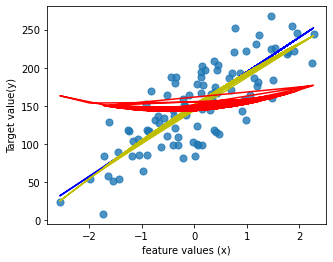

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

# Linear Regression
linRegModel = LinearRegression().fit(X_train, y_train)
print('linear Regression coeff : {}'.format(linRegModel.coef_))
print('linear regression intercept : {}'.format(linRegModel.intercept_))
print('linear regression Train score {:.3f}'.format(linRegModel.score(X_train, y_train)))
print('linear regression Test Score : {:.3f}'.format(linRegModel.score(X_test, y_test)))

print("----------------------------------------")

# PolyNomial processing Linear Regression
poly = PolynomialFeatures(degree=2)
X_R1_POLY_2 = poly.fit_transform(X_R1)

X_po2_train, X_po2_test, y_po_train, y_po_test  = train_test_split(X_R1_POLY_2, y_R1, random_state=1)

linRegPolyModel = LinearRegression().fit(X_po2_train, y_po_train)
print('Poly linear Regression coeff : {}'.format(linRegPolyModel.coef_))
print('Poly Linear Regression intercept : {}'.format(linRegModel.intercept_))
print('Poly Linear Regression train score : {}'.format(linRegPolyModel.score(X_po2_train, y_po_train)))
print('Poly linear Regression test score : {}'.format(linRegPolyModel.score(X_po2_test, y_po_test)))

print("--------------------------------------")


# Ridge Linear Regression with panelty

X_po2_train, X_po2_test, y_po_train, y_po_test  = train_test_split(X_R1_POLY_2, y_R1, random_state=1)

ridge = Ridge().fit(X_po2_train, y_train)

print('Poly Ridge Regression coeff : {}'.format(ridge.coef_))
print('Poly Ridge Regression intercept : {}'.format(ridge.intercept_))
print('Poly Ridge Regression train score : {}'.format(ridge.score(X_po2_train, y_po_train)))
print('Poly Ridge Regression test score : {}'.format(ridge.score(X_po2_test, y_po_test)))


print("---------------------------------------")

# Plot of Graph
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linRegModel.coef_ * X_R1 + linRegModel.intercept_, 'b-')
plt.plot(X_R1, linRegPolyModel.predict(poly.transform(X_R1)), 'y-')
plt.plot(X_R1, ridge.predict(poly.transform(X_R1)), 'r-')
plt.xlabel('feature values (x)')
plt.ylabel('Target value(y)')
plt.plot()

Support Vector machine


In [12]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

this_C = 1.0
clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)



ValueError: Unknown label type: 'continuous'